# IPL - Exploratory Data Analysis ( Season 2008-19 )

**Hi viewers, following analysis has been carried out using some of the Python libraries such as Pandas and Numpy for basic analysis of data and matplotlib, seaborn, cufflinks, plotly.express and plotly for visualization purposes. Conclusion of the analysis is mentioned below the final visualization wherever necessary. Following questions/points have been analysed in the notebook.**


1. [Most number of wins by team](#section-one)
2. [Number of matches each season](#section-two)
3. [Number of matches played in each venue](#section-three)
4. [Most number of wins by team by runs ( Matches won while defending the target.)](#section-four)
5. [Most number of wins by team by wickests ( Matches won while chasing the target.)](#section-five)
6. [Wins of team analyis by toss decision](#section-six)

* [7. IPL Venue Analysis](#section-seven): 
    1. [Number Of matches played at each stadium and toss decision](#subsection-one)
    2. [Number of matches won at each stadium and toss decision](#subsection-two)
8. [Top 20 Man of the matches](#section-eight)
9. [Indivisual team analysis](#section-nine)


In [1]:
# Importing the libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly as px
from plotly.offline import download_plotlyjs, plot, iplot, init_notebook_mode
%matplotlib inline

In [2]:
import plotly.tools as tls   
import plotly.graph_objs as go
import plotly.express as px

In [3]:
init_notebook_mode(connected = True)
cf.go_offline()

In [4]:
df1 = pd.read_csv('/kaggle/input/ipl-dataset-20082019/matches.csv')
df = df1

In [5]:
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


<a id= "section-one"></a>
# Most number of wins by team

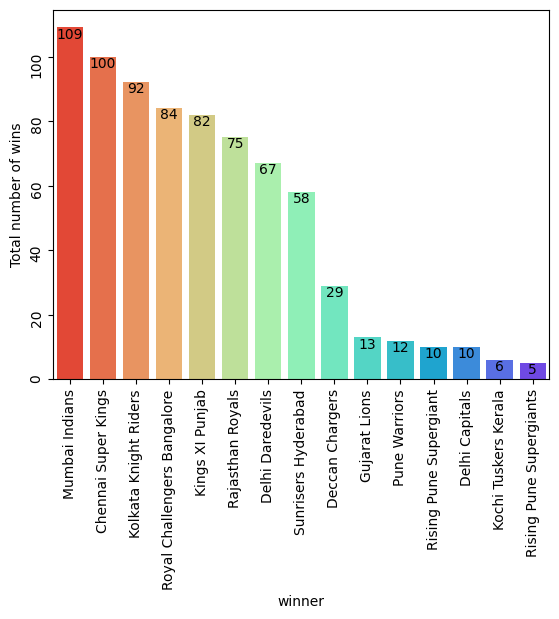

In [6]:
cplot = sns.countplot(x = 'winner',data =df, order = df['winner'].value_counts().index, palette = 'rainbow_r')
for p in cplot.patches:
    cplot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2, p.get_height()),  ha = 'center', va = 'center', xytext = (0, -5), textcoords = 'offset points')
plt.tick_params(rotation = 90)
plt.ylabel('Total number of wins')
plt.rcParams.update({'grid.color' : '0.5', 'grid.linewidth':'0.5','lines.color':'k'})
plt.show()

### CONCLUSION:

*It can be clearely seen that Mumbai Indians ranks as the best team amongst all winning overall 109 matches, with Chennai Super Kings being ranked on second postion.*

<a id= "section-two"></a>
#  Number of matches played each season

In [7]:
df1 = df.sort_values(by=['Season'])

In [8]:
# Number of matches played every season
df1['Season'].value_counts().iplot(kind = 'line', title = 'Number of matches by season' )
# df1.sort_values('Season').value_counts()

<a id= "section-three"></a>
# Number of matches played in each venue

In [9]:
x =df['city'].value_counts().index
y =df['city'].value_counts().values
fig = px.bar(df, x = x, y = y, color = y, labels = {'x':'City', 'y':'Matches'}, 
             text = y,color_continuous_scale = 'blackbody', 
             title =' Number Of Matches Played In Each City'  )
fig.show()

<a id= "section-four"></a>
#  Most number of wins by team by runs

In [10]:
x = df.groupby('winner').sum()['win_by_runs'].sort_values(ascending = True).index
y = df.groupby('winner').sum()['win_by_runs'].sort_values(ascending = True).values
px.bar(df, x = x , y = y,text = y, labels = {'x':'Team','y':'Number of runs'},
      color_continuous_scale = 'plotly3',
      color = y,
      title = 'Number Of Wins By Runs')

### CONCLUSION: 
*It can be seen from above graph that, according to the most number of wins by runs, Mumbai Indians stand as the best target defending team. We can match our conclusion of run chase analysis with the wins made by team with toss decision as main feature.
Chennai Super Kings is also the second best target defending team followed by Royal Challengers Banglore.*

<a id= "section-five"></a>
# Most number of wins by wickets

In [11]:
df.groupby('winner').sum()['win_by_wickets'].sort_values().iplot(kind = 'bar', title = 'Number of wins by wickets',
                                                                yTitle = 'Number of wickets')


### CONCLUSION:
*We can infer from the above analysis that, this time it is Kolkata Knight Riders which stands as the best target chasing team followed by Royal Challengers Banglore. When it comes to chasing the target, Mumbai Indians stands as third best team.*

<a id= "section-six"></a>
# Wins of Team analyis by toss decision

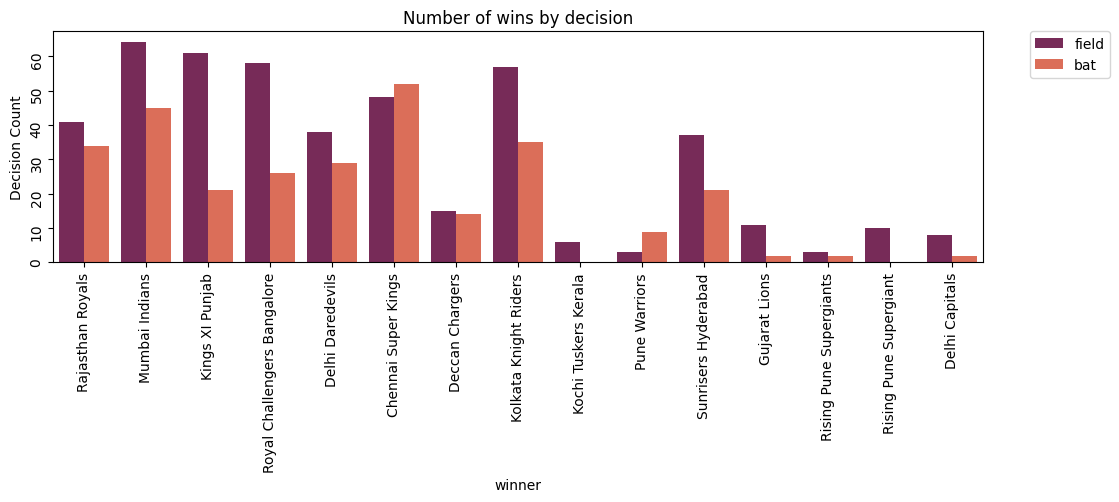

In [12]:
plt.figure(figsize = (12,3))
plt.rcParams.update({'grid.color' : '0.5', 'grid.linewidth':'5','lines.color':'k'})
sns.countplot(data = df1, x = 'winner', hue = 'toss_decision', palette ='rocket')
plt.tick_params(rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Number of wins by decision')
plt.ylabel('Decision Count')
plt.show()

### CONCLUSION:
*We can clearaly observe and match some of our results from the bargraphs plotted above. Being the best target defending team, Mumbai Indians have most of the wins electing field option after winning the toss. Above graph also tells us that it is the team best at chasing the targets also. It is quite notable that only two teams have number of wins greater electing bat first those are Chennai Super Kings and Pune Warriors India.*

<a id="section-seven"></a>
# IPL venue analysis

In [13]:
df1.head(5)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
116,117,IPL-2008,Mumbai,01-06-2008,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen,NaN
82,83,IPL-2008,Jaipur,04-05-2008,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,normal,0,Rajasthan Royals,0,8,Sohail Tanvir,Sawai Mansingh Stadium,Asad Rauf,AV Jayaprakash,NaN
81,82,IPL-2008,Mumbai,04-05-2008,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,29,0,SM Pollock,Dr DY Patil Sports Academy,IL Howell,RE Koertzen,NaN
80,81,IPL-2008,Chandigarh,03-05-2008,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,bat,normal,0,Kings XI Punjab,9,0,IK Pathan,"Punjab Cricket Association Stadium, Mohali",DJ Harper,I Shivram,NaN
79,80,IPL-2008,Hyderabad,25-05-2008,Deccan Chargers,Royal Challengers Bangalore,Deccan Chargers,bat,normal,0,Royal Challengers Bangalore,0,5,R Vinay Kumar,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,RE Koertzen,NaN


<a id="subsection-one"></a>
# Number Of Matches Played At Each Stadium And Toss Decision


In [14]:
df2 = df.groupby(['venue','toss_decision']).size().reset_index().pivot(index = 'venue', columns = 'toss_decision', values = 0)

<Figure size 1500x600 with 0 Axes>

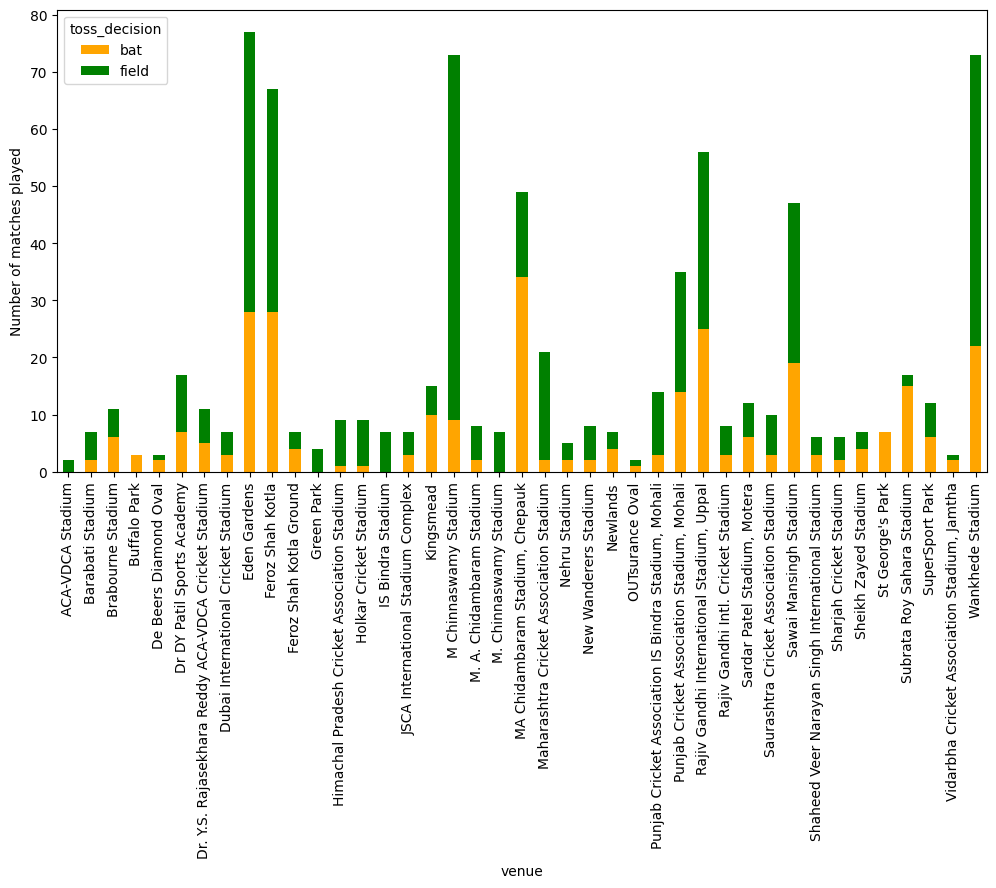

In [15]:
fig = plt.figure(figsize=(15,6))
df2.plot(kind = 'bar', stacked = True, figsize=(12,6), ylabel = 'Number of matches played', 
         color={'bat':'orange','field':'green'}, )
plt.show()

### CONCLUSION: 
*It can be clearly inferred that following are the stadiums where most of the teams have elected field first:*
1. Eden Garderns
2. Firoz Shah Kotla
3. Green Park (Every Team has elected field first)
4. HPCA
5. IS Bindra (Every team has elected field first)
6. M.Chinnaswammy
7. Maharashta Cricket Association
8. Wankhede Stadium

*Stadiums Where most of times batting has been elected first:*
1. M.A. Chidambaram
2. Subrata Roy
3. ST. George's Park (Only Stadium where all time batting is elected first)

<a id="subsection-two"></a>
# Number Of Matches Won At Each Stadium And Toss Decision


In [16]:
toss_won = []
for i in range(len(df1['venue'])):
    toss_won.append(df['toss_winner'][i] == df['winner'][i])


In [17]:
df1['Match_won'] = toss_won

In [18]:
df3 = df1[['venue','toss_winner','Match_won','toss_decision']]
df3

,venue,toss_winner,Match_won,toss_decision
116,Dr DY Patil Sports Academy,Rajasthan Royals,False,field
82,Sawai Mansingh Stadium,Chennai Super Kings,True,bat
81,Dr DY Patil Sports Academy,Delhi Daredevils,True,field
80,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,True,bat
79,"Rajiv Gandhi International Stadium, Uppal",Deccan Chargers,True,bat
...,...,...,...,...
721,Eden Gardens,Delhi Capitals,True,field
722,Wankhede Stadium,Rajasthan Royals,False,field
723,IS Bindra Stadium,Royal Challengers Bangalore,True,field
725,Rajiv Gandhi Intl. Cricket Stadium,Sunrisers Hyderabad,True,field


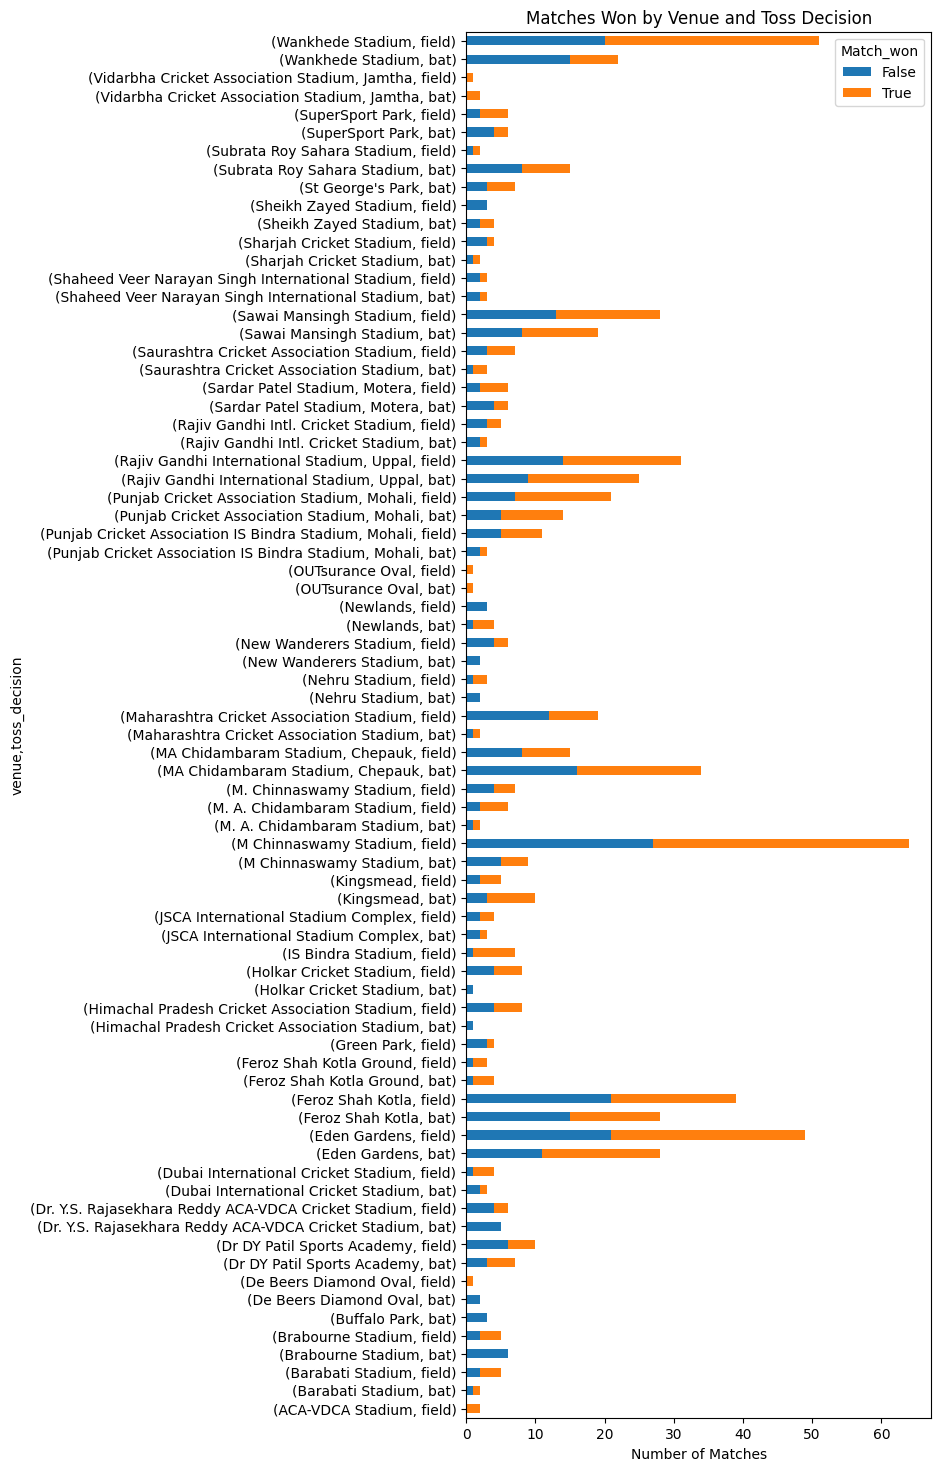

In [19]:
ax = df3.groupby(['venue', 'toss_decision', 'Match_won']).size().reset_index().pivot(
    index=['venue', 'toss_decision'], 
    columns='Match_won', 
    values=0
).fillna(0)

# Plotting the data
ax.plot.barh(stacked=True, figsize=(6, 18))
plt.rcParams['font.size'] = 10
plt.xlabel('Number of Matches')
plt.title('Matches Won by Venue and Toss Decision')
plt.show()


### CONCLUSION:
*Indivisual analysis of each stadium can be easily carried out and the result can be used to predict what prefferably team will elect first considering the pitch conditions of different stadiums as the above data clearely shows the number of wins with respect to the elected toss decision.*

<a id="section-eight"></a>
# Top 20 Players Of The IPL

In [20]:
x = df1['player_of_match'].value_counts().head(20).index
y = df1['player_of_match'].value_counts().head(20).values
px.bar(df1, x = x, y = y, title = 'Top 20 Players',
       color = y,
       color_continuous_scale = 'electric_r',
       labels = {'x':'Players','y':'Times MoMs'},
      text = y)

<a id="section-nine"></a>
# Indivisual Team Analysis

In [21]:
team_list = df1['team1'].unique()

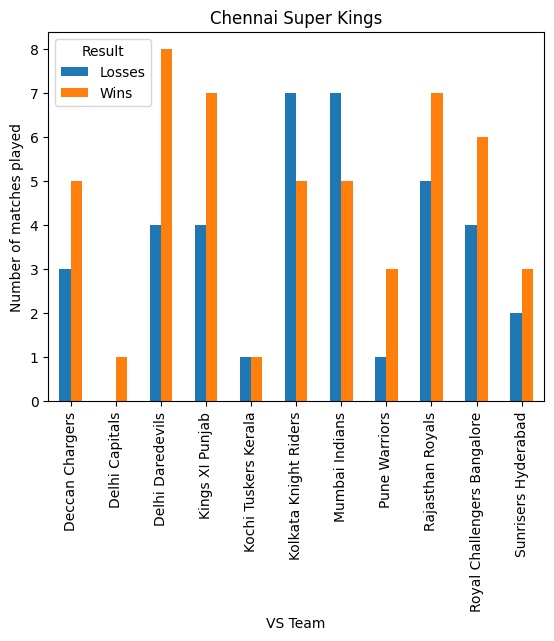

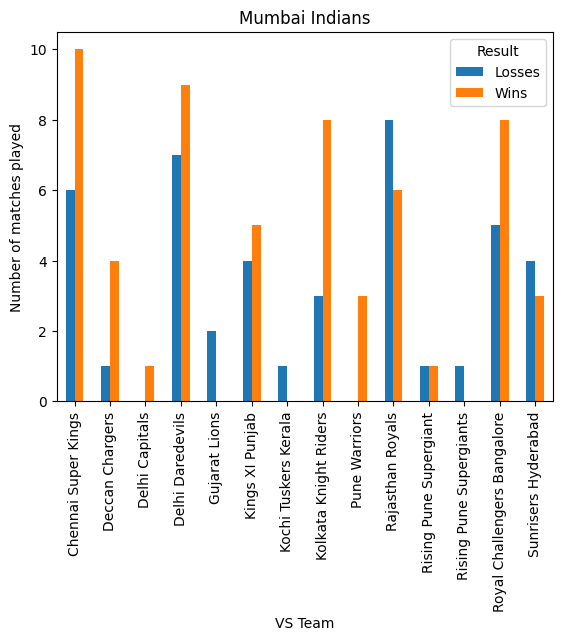

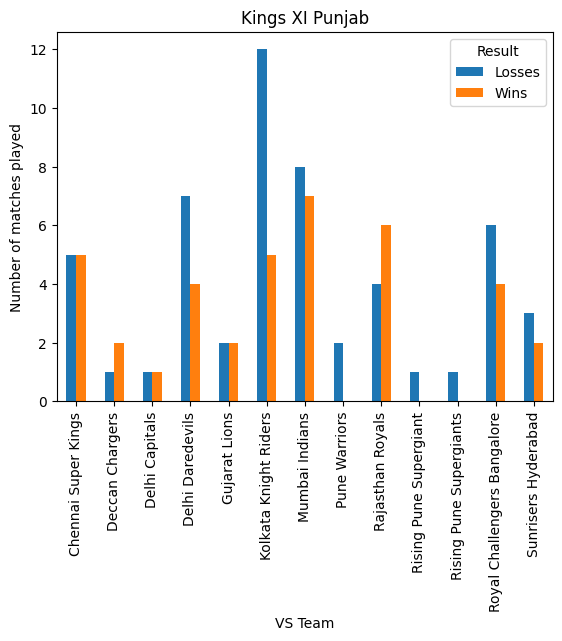

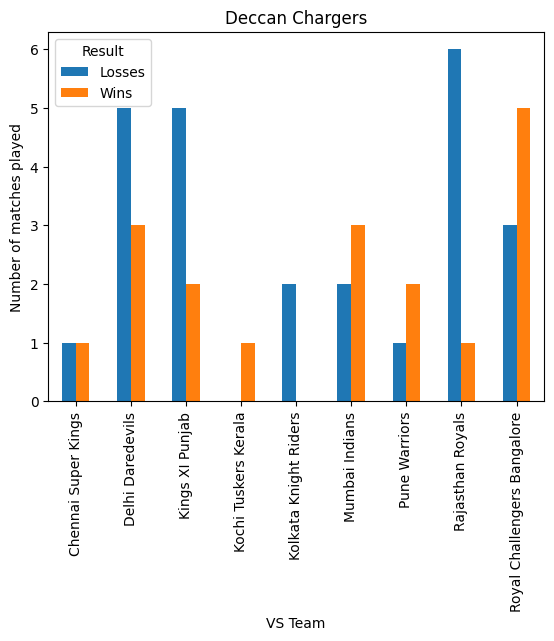

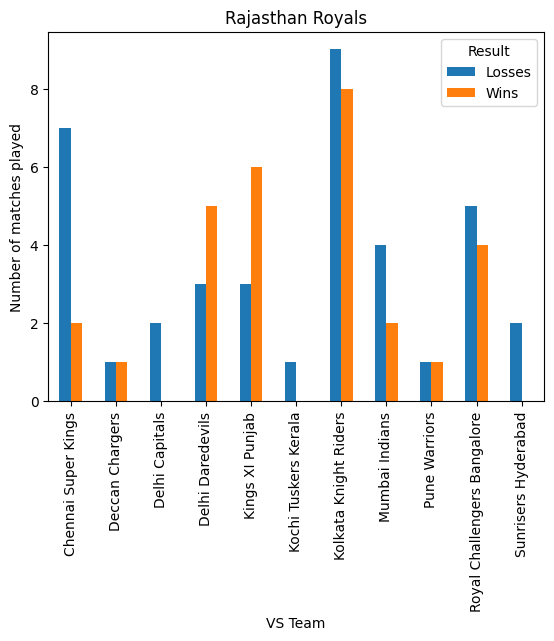

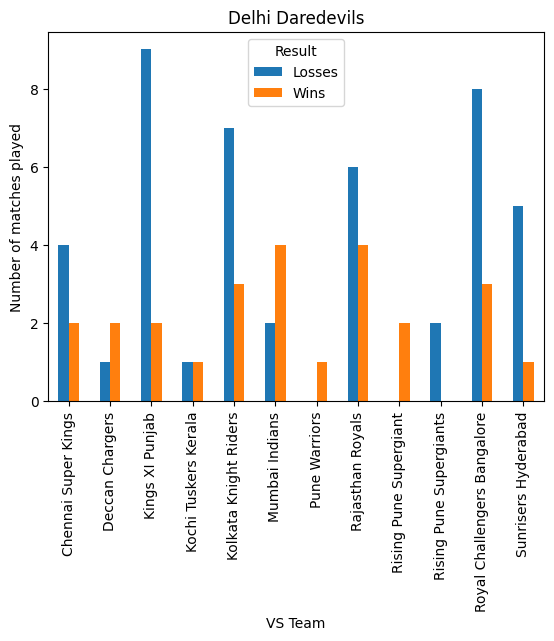

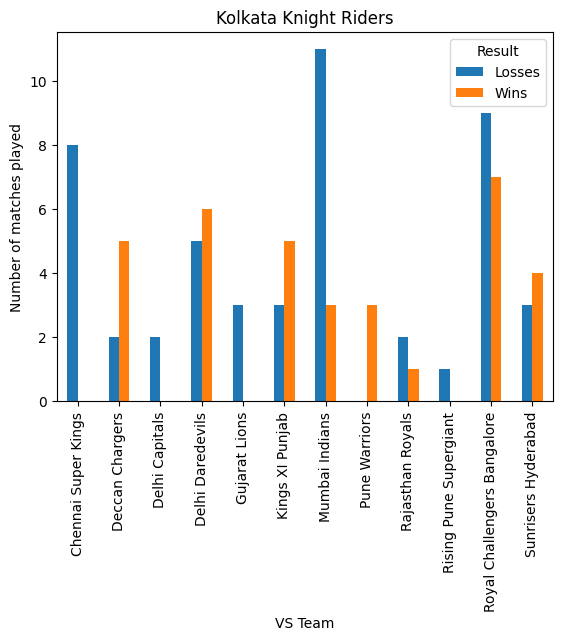

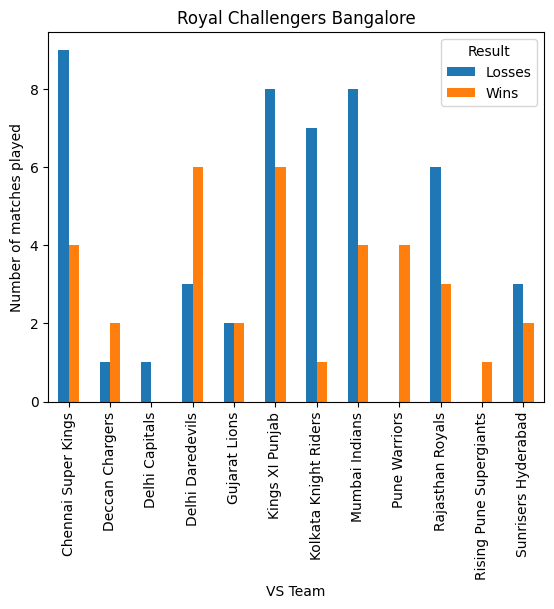

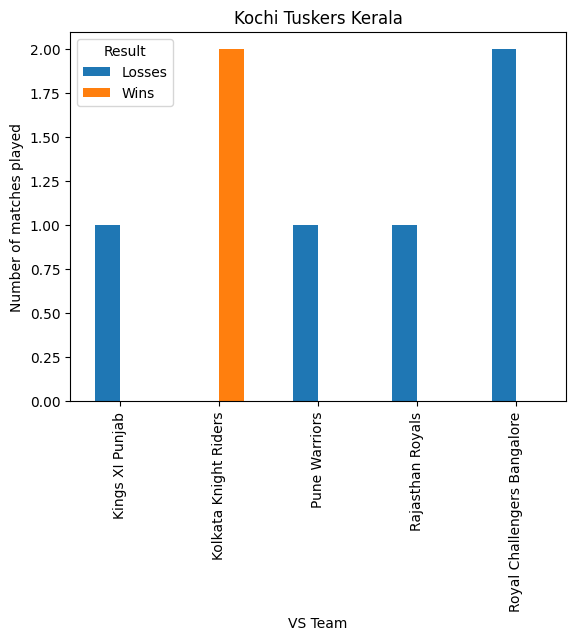

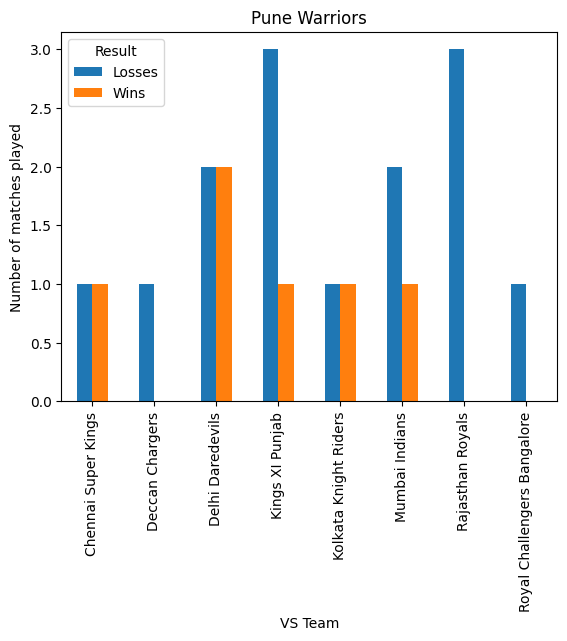

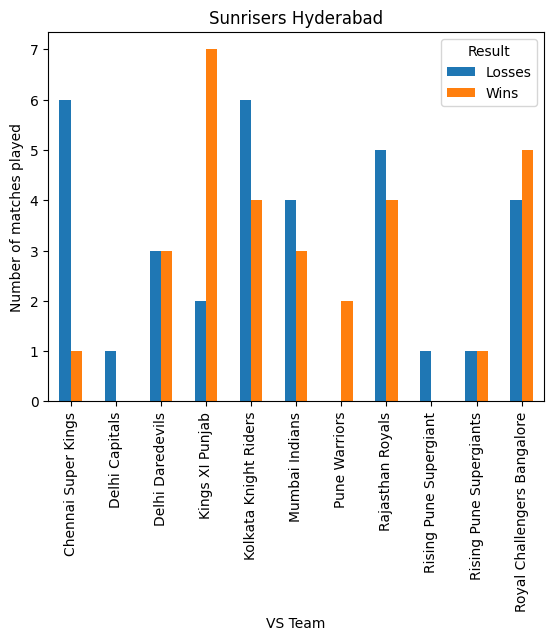

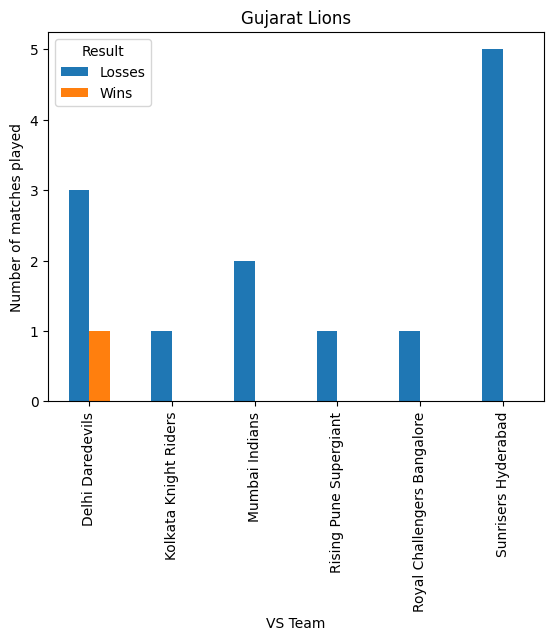

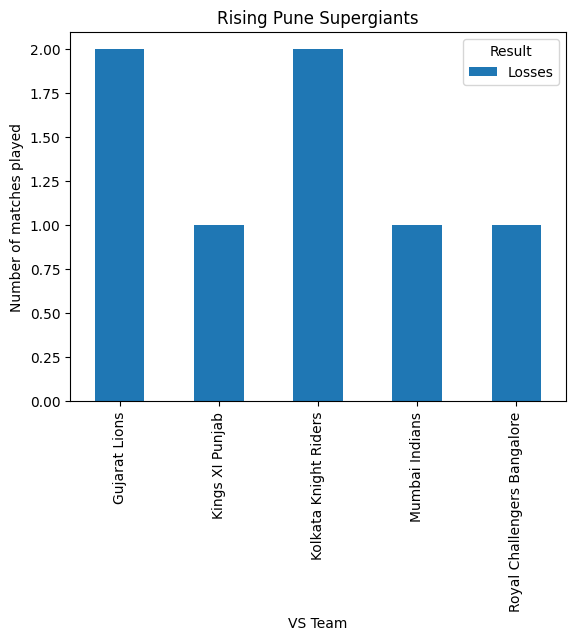

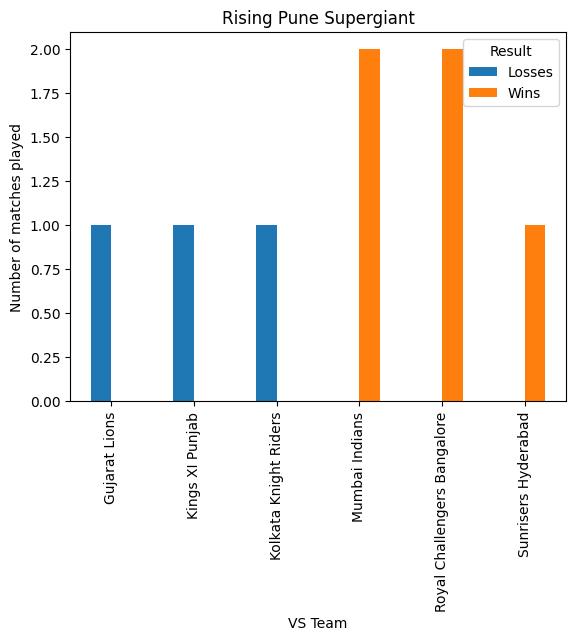

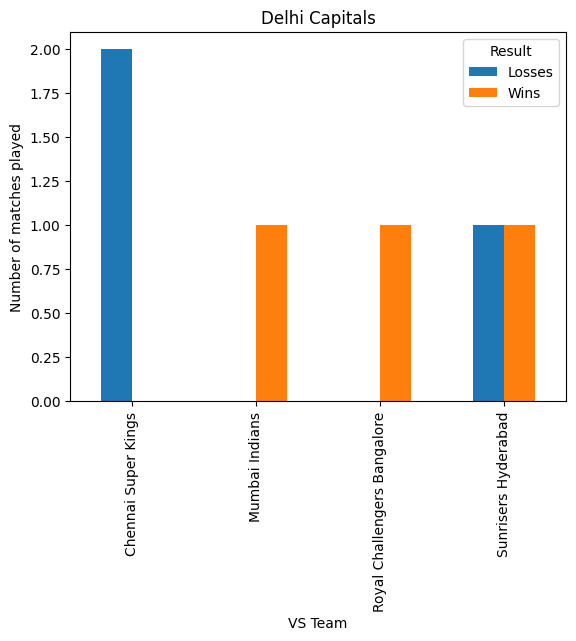

In [22]:
for team in team_list:
    SH = df1.groupby(['team1','team2','winner']).size()[team]
    SH = pd.DataFrame(SH)
    SH = SH.reset_index()
    Result = []
    for i in range(0,len(SH['team2'])):
        if SH['team2'][i] == SH['winner'][i]:
            Result.append('Losses')
        else:
            Result.append('Wins')
    SH['Result'] = Result
    SH.pivot(index = 'team2', columns = 'Result', values = 0).plot(kind = 'bar', ylabel = 'Number of matches played'
                                                                  ,xlabel = 'VS Team', title =team)
    plt.show()






# Thank You !